## Notebook Overview


With this notebook we can explore the shapes of our input pictures for our modell. Based on the results we can further adjust our modell f.e filter the low resolution pictures, determine the optimal input shape during preprocessing etc.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Identify Image Resolutions

# Import Packages
import os
import pandas as pd
import matplotlib.pyplot  as plt
from PIL import Image
from pathlib import Path
import imagesize
import numpy as np
import seaborn as sns


In [ ]:
#create a list of pcitures filepaths
image_dir= '/content/drive/MyDrive/training_demo/images/train_bohne_512' 
files = os.listdir(image_dir)
#print(files)
image_list = []
for file in files:
  if file.endswith("jpg"):
    image_list.append(image_dir +"/" + file)
print(len(image_list))



1579


In [ ]:
#get image sizes for each picture in our list
#store the result in a dictonary with image_path as key and image_size as value
img_meta = {}
for f in image_list: img_meta[str(f)] = imagesize.get(f)

In [ ]:
# Convert dictonary to Dataframe and compute aspect ratio
image_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
image_df[["Width", "Height"]] = pd.DataFrame(image_df["Size"].tolist(), index=image_df.index) #converts tuple to list and distributes values to width and height
image_df["Aspect_Ratio"] = round(image_df["Width"] / image_df["Height"], 2)

print(f'Total Nr of Images in the dataset: {len(image_df)}')
image_df.head()

Total Nr of Images in the dataset: 441


,FileName,Size,Width,Height,Aspect_Ratio
0,/content/drive/MyDrive/training_demo/images/te...,"(612, 612)",612,612,1.00
1,/content/drive/MyDrive/training_demo/images/te...,"(640, 544)",640,544,1.18
2,/content/drive/MyDrive/training_demo/images/te...,"(612, 612)",612,612,1.00
3,/content/drive/MyDrive/training_demo/images/te...,"(571, 640)",571,640,0.89
4,/content/drive/MyDrive/training_demo/images/te...,"(629, 640)",629,640,0.98


In [ ]:
#first overview of the data 
image_df.describe()

,Width,Height,Aspect_Ratio
count,1579.000000,1579.000000,1579.000000
mean,1190.815073,1284.140595,0.990937
std,309.203054,368.233030,0.337522
min,232.000000,210.000000,0.370000
25%,1024.000000,1024.000000,0.750000
50%,1200.000000,1472.000000,0.880000
75%,1600.000000,1600.000000,1.330000
max,1920.000000,2400.000000,2.440000


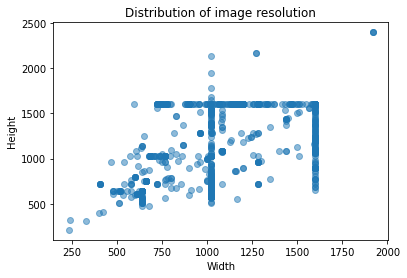

In [ ]:
# Visualize Image Resolutions
%matplotlib inline
plt.scatter(image_df.Width, image_df.Height, alpha=0.5)
plt.title("Distribution of image resolution" )
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

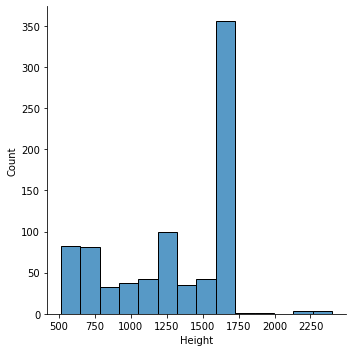

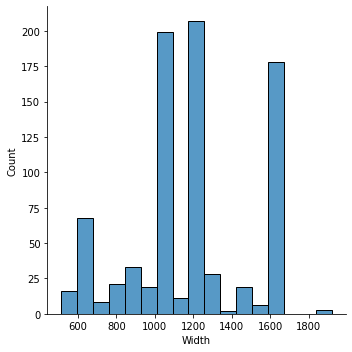

In [ ]:
#visualize Height/Width with countplot
sns.displot(x="Height", data=image_df)
sns.displot(x="Width", data=image_df)

In [ ]:
#create a df with differnt image resolutions and count them
imgsize_count= image_df.Size.value_counts().to_frame()

#get most most commom image resolutions 
mask1= imgsize_count.Size >=5

imgsize_count.loc[mask1,:]

In [ ]:
#filter Dataframe based on height and width (imag resolution)
image_df.loc[(image_df.Height >= 512) & (image_df.Width >= 512), :]

,FileName,Size,Width,Height,Aspect_Ratio
0,/content/drive/MyDrive/training_demo/images/tr...,"(1024, 680)",1024,680,1.51
1,/content/drive/MyDrive/training_demo/images/tr...,"(681, 1024)",681,1024,0.67
2,/content/drive/MyDrive/training_demo/images/tr...,"(1024, 1024)",1024,1024,1.00
3,/content/drive/MyDrive/training_demo/images/tr...,"(713, 1024)",713,1024,0.70
4,/content/drive/MyDrive/training_demo/images/tr...,"(683, 1024)",683,1024,0.67
...,...,...,...,...,...
1574,/content/drive/MyDrive/training_demo/images/tr...,"(612, 612)",612,612,1.00
1575,/content/drive/MyDrive/training_demo/images/tr...,"(640, 640)",640,640,1.00
1576,/content/drive/MyDrive/training_demo/images/tr...,"(640, 640)",640,640,1.00
1577,/content/drive/MyDrive/training_demo/images/tr...,"(612, 612)",612,612,1.00
